In [15]:
import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

def get_data(U,mu):
    '''
    reads a FRG output text file
    and returns the number of k1 and k2 points used, as well as the data for all three action channels

    '''
  


    df = pd.read_csv("1NN_" + f"{U}" +"_"+ f"{mu}" + "_40_10.txt", delimiter="\t", header = None, skiprows = 1) 

    r = df.iloc[-1, 0]
    n = r.split()

    tc, sc, mag, cdw, _ = map(float, n)

    
    if sc <= 1e-02 and  mag  <= 1e-02 and cdw <= 1e-02:  # Check if Tc is in the order of magnitude of 10^-6 or smaller
        dominant = 3

    else:
        orders = [sc, mag, cdw]
        o_max = max(orders)
        dominant = orders.index(o_max)
    
    
    return tc, sc, mag, cdw, dominant
    
    return tc, sc, mag, cdw, dominant

    




In [12]:
Us= [0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00, 5.25, 5.50, 5.75, 6.00, 6.25, 6.50, 6.75, 7.00, 7.25, 7.50, 7.75, 8.00]
mus= [0.0, 0.1, 0.2, 0.3, 0.4, 0.5 ,0.6 , 0.7, 0.8, 0.9, 1.0]



X, Y = np.meshgrid(mus, Us)
Tcs = np.zeros((33,11))
dom = np.zeros((33,11))

for i, u in enumerate(Us):
    for j, mu in enumerate(mus):
        
        Tcs[i][j] = get_data(u,mu)[0]
        dom[i][j] = get_data(u, mu)[4]

print(dom)

[[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [1. 3. 1. 3. 3. 3. 3. 1. 3. 3. 1.]
 [1. 3. 1. 3. 3. 3. 3. 1. 3. 3. 1.]
 [1. 3. 1. 3. 3. 3. 3. 1. 3. 3. 1.]
 [1. 3. 0. 3. 3. 3. 3. 1. 3. 3. 1.]
 [1. 0. 0. 3. 3. 3. 3. 1. 3. 3. 1.]
 [1. 1. 0. 3. 3. 3. 3. 1. 3. 3. 1.]
 [1. 1. 0. 3. 3. 3. 3. 1. 3. 3. 1.]
 [1. 1. 0. 0. 0. 3. 3. 1. 3. 3. 1.]
 [1. 1. 0. 0. 0. 0. 3. 1. 3. 3. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 3. 3. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 3. 3. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 3. 3. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 3. 0. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 3. 0. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 3. 0. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.

/tmp/ipykernel_3183/3443035055.py:8: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)


Text(0.5, 0, '$\\mu$')

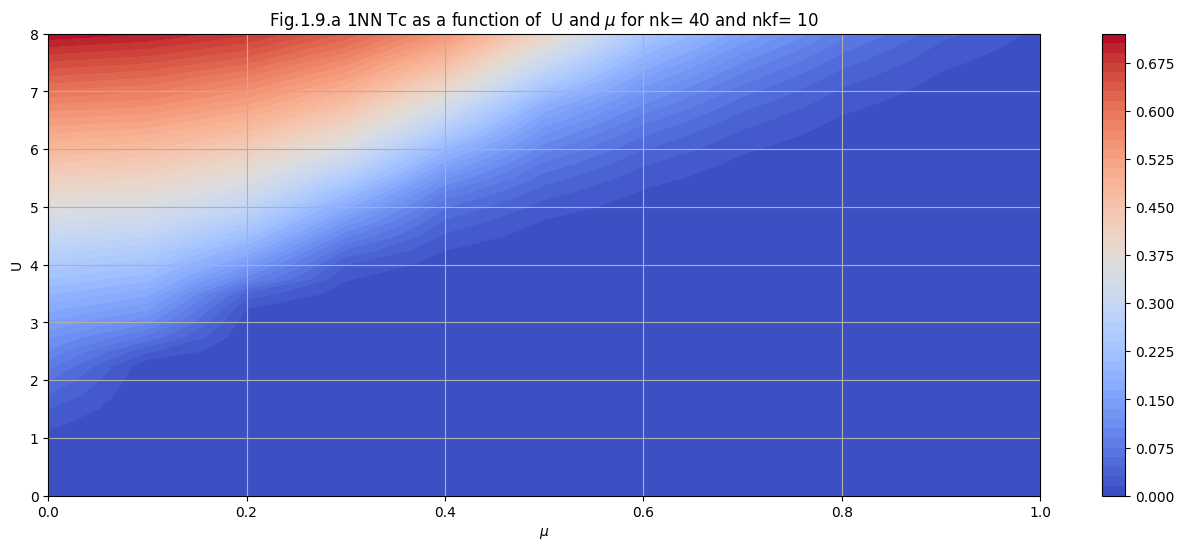

In [13]:
#plot tc


fig, ax = plt.subplots(figsize=(16, 6))

#ax.set_aspect('equal')
ax.grid()
C = ax.contourf(X, Y, Tcs,  levels = 50, cmap = 'coolwarm', linewidths=1.5)
fig.colorbar(C, ax=ax, orientation='vertical')

ax.set_title(f"Fig.1.9.a 1NN Tc as a function of  U and $\mu$ for nk= 40 and nkf= 10")
ax.set_ylabel("U")
ax.set_xlabel(r"$\mu$")


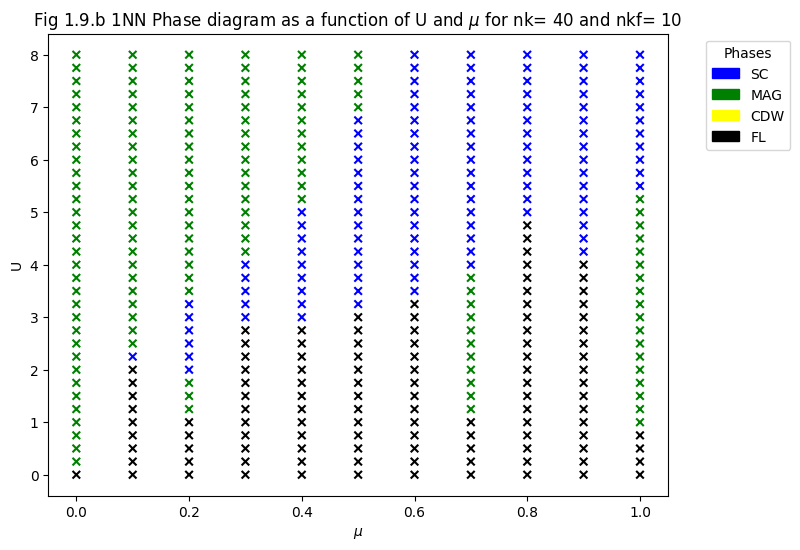

In [16]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

colors = ['blue', 'green', 'yellow', 'black']  
labels = ['SC', 'MAG', 'CDW', 'FL']
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, 3.5, 1), cmap.N)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X, Y, c=dom, cmap=cmap, norm=norm, s=30, marker = 'x')


plt.ylabel('U')
plt.xlabel(r'$\mu$')
plt.title(f'Fig 1.9.b 1NN Phase diagram as a function of U and $\mu$ for nk= 40 and nkf= 10')

legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_patches, title="Phases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()